In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
df=pd.read_csv('churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5986 non-null   object 
 1   gender            5986 non-null   object 
 2   SeniorCitizen     5986 non-null   int64  
 3   Partner           5986 non-null   object 
 4   Dependents        5986 non-null   object 
 5   tenure            5986 non-null   int64  
 6   PhoneService      5986 non-null   object 
 7   MultipleLines     5986 non-null   object 
 8   InternetService   5986 non-null   object 
 9   OnlineSecurity    5986 non-null   object 
 10  OnlineBackup      5986 non-null   object 
 11  DeviceProtection  5986 non-null   object 
 12  TechSupport       5986 non-null   object 
 13  StreamingTV       5986 non-null   object 
 14  StreamingMovies   5986 non-null   object 
 15  Contract          5986 non-null   object 
 16  PaperlessBilling  5986 non-null   object 


In [4]:
# Converting datatype of TotalCharges to float
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')

In [5]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        10
Churn                0
dtype: int64

In [6]:
df[df['TotalCharges'].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
356,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN,No
634,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
2771,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
3086,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
3255,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
4326,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
5375,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
5382,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5695,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
5951,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No


In [7]:
df = df.dropna(axis = 0, how = 'all', subset = ['TotalCharges'])
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5976 entries, 0 to 5985
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5976 non-null   object 
 1   gender            5976 non-null   object 
 2   SeniorCitizen     5976 non-null   int64  
 3   Partner           5976 non-null   object 
 4   Dependents        5976 non-null   object 
 5   tenure            5976 non-null   int64  
 6   PhoneService      5976 non-null   object 
 7   MultipleLines     5976 non-null   object 
 8   InternetService   5976 non-null   object 
 9   OnlineSecurity    5976 non-null   object 
 10  OnlineBackup      5976 non-null   object 
 11  DeviceProtection  5976 non-null   object 
 12  TechSupport       5976 non-null   object 
 13  StreamingTV       5976 non-null   object 
 14  StreamingMovies   5976 non-null   object 
 15  Contract          5976 non-null   object 
 16  PaperlessBilling  5976 non-null   object 


In [9]:
# analyse descriptive des variables numeriques
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5976.000000,5976.000000,5976.000000,5976.000000
mean,0.161647,32.523092,64.846687,2298.060617
std,0.368157,24.500858,30.107576,2274.127165
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.750000,404.312500
50%,0.000000,29.000000,70.425000,1412.150000
75%,0.000000,56.000000,89.900000,3846.962500
max,1.000000,72.000000,118.750000,8684.800000


In [10]:
df['SeniorCitizen'].value_counts()

0    5010
1     966
Name: SeniorCitizen, dtype: int64

In [11]:
# analyse d'anciennete client : tenure
df['tenure'].value_counts()

1     510
72    308
2     194
3     169
4     154
     ... 
38     49
45     47
44     47
39     44
36     43
Name: tenure, Length: 72, dtype: int64

<AxesSubplot:xlabel='tenure', ylabel='Count'>

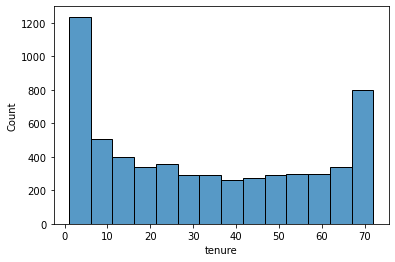

In [12]:
sns.histplot(df['tenure'])

<AxesSubplot:xlabel='tenure', ylabel='Count'>

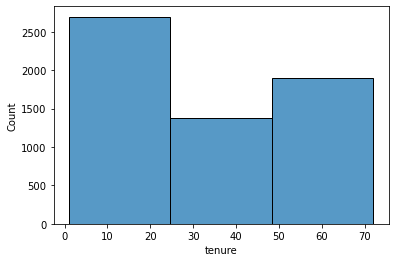

In [13]:
# d'apres la distribution,on peut les regrouper en 3 lots
sns.histplot(df['tenure'],bins=3)

/home/maxime/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


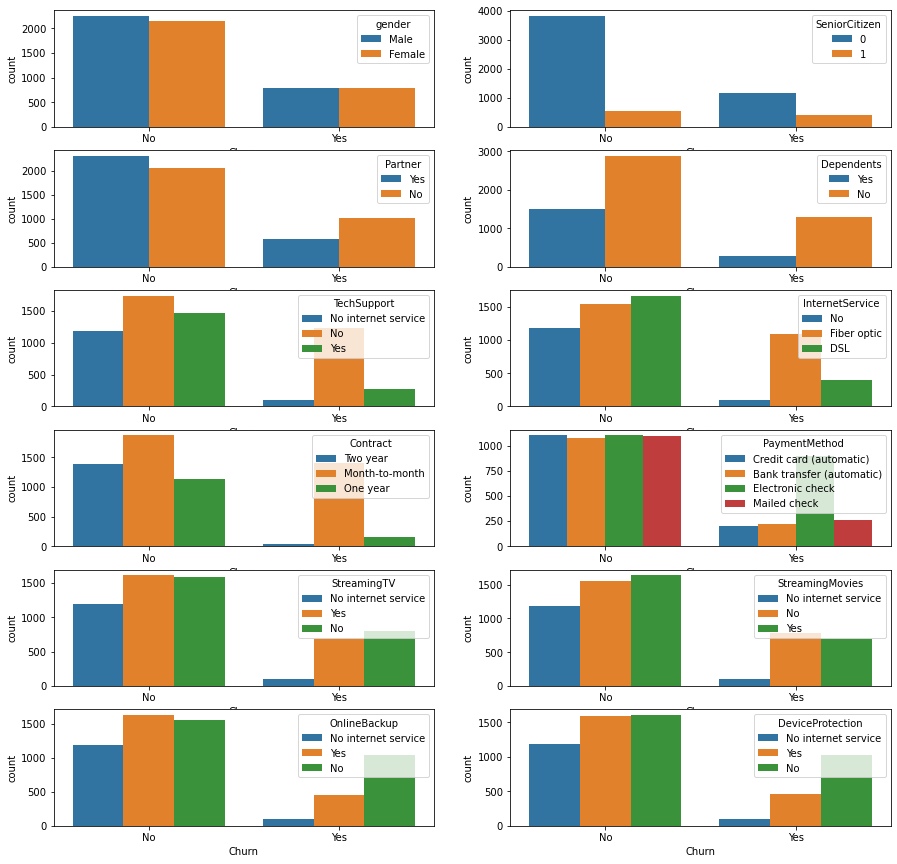

In [14]:
fig, ax = plt.subplots(6,2,figsize=(15,15))
sns.countplot(x=df['Churn'],hue=df['gender'], ax=ax[0,0],data=df)
sns.countplot(x=df['Churn'],hue=df["SeniorCitizen"], ax=ax[0,1],data=df)

sns.countplot(x=df['Churn'],hue=df["Partner"], ax=ax[1,0],data=df)
sns.countplot(df['Churn'],hue=df["Dependents"], ax=ax[1,1],data=df)

sns.countplot(x=df['Churn'],hue=df["TechSupport"], ax=ax[2,0],data=df)
sns.countplot(x=df['Churn'],hue=df["InternetService"],ax=ax[2,1],data=df)

sns.countplot(x=df['Churn'],hue=df["Contract"], ax=ax[3,0],data=df)
sns.countplot(x=df['Churn'],hue=df["PaymentMethod"],ax=ax[3,1],data=df)

sns.countplot(x=df['Churn'],hue=df["StreamingTV"], ax=ax[4,0],data=df)
sns.countplot(x=df['Churn'],hue=df["StreamingMovies"],ax=ax[4,1],data=df)

sns.countplot(x=df['Churn'],hue=df["OnlineBackup"], ax=ax[5,0],data=df)
sns.countplot(x=df['Churn'],hue=df["DeviceProtection"],ax=ax[5,1],data=df)

plt.xlabel="Churn"
plt.ylabel="Count"


d'apres l'EDA, on note que :

ceux qui n'ont pas de Online backup sont 2x plus sensible au desabonnement que ceux qui l'ont

idem pour ceux qui n'ont pas la protection Device

La difference entre le fait d'avoir ou non le streaming TV et streaming Movies n'influe pas sur le churn idem pour le genre => on peut supprimer ces colonnes 'Gender','StreamingTV','StreamingMovies'

L'abonnement fibre est susceptible de bien influer sur le churn surtout s'il est appuyé sur le fait de ne pas beneficier du support technique qui peut suggerer que le mecontentement se traduite par un churn En outre si l'abonné utilise le paiement en ligne, il serait assez prompt de resilier son abonnemnet.


In [15]:
df.drop(['customerID','gender','StreamingTV','StreamingMovies'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5976 entries, 0 to 5985
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     5976 non-null   int64  
 1   Partner           5976 non-null   object 
 2   Dependents        5976 non-null   object 
 3   tenure            5976 non-null   int64  
 4   PhoneService      5976 non-null   object 
 5   MultipleLines     5976 non-null   object 
 6   InternetService   5976 non-null   object 
 7   OnlineSecurity    5976 non-null   object 
 8   OnlineBackup      5976 non-null   object 
 9   DeviceProtection  5976 non-null   object 
 10  TechSupport       5976 non-null   object 
 11  Contract          5976 non-null   object 
 12  PaperlessBilling  5976 non-null   object 
 13  PaymentMethod     5976 non-null   object 
 14  MonthlyCharges    5976 non-null   float64
 15  TotalCharges      5976 non-null   float64
 16  Churn             5976 non-null   object 


In [16]:
feats = ['tenure','MonthlyCharges','TotalCharges']
cat=['Partner','SeniorCitizen','Dependents','PhoneService',\
    'MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',\
        'Contract','PaperlessBilling','PaymentMethod']

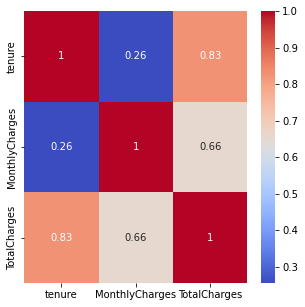

In [17]:
# matrice de corrélation des var quantitatives
matrice= df[feats].corr()
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(matrice,annot=True,ax=ax,cmap="coolwarm");

Comme il y a une forte corrélation > 0.83 entre TotalCharges et tenure, on peut supprimer TotalCharge pour ne pas risquer overfitter le modele et on conserve le MonthlyCharges => suppression de TotalCharges

In [18]:
df.drop(['TotalCharges'],axis=1,inplace=True)

In [19]:
feats = ['tenure','MonthlyCharges']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5976 entries, 0 to 5985
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     5976 non-null   int64  
 1   Partner           5976 non-null   object 
 2   Dependents        5976 non-null   object 
 3   tenure            5976 non-null   int64  
 4   PhoneService      5976 non-null   object 
 5   MultipleLines     5976 non-null   object 
 6   InternetService   5976 non-null   object 
 7   OnlineSecurity    5976 non-null   object 
 8   OnlineBackup      5976 non-null   object 
 9   DeviceProtection  5976 non-null   object 
 10  TechSupport       5976 non-null   object 
 11  Contract          5976 non-null   object 
 12  PaperlessBilling  5976 non-null   object 
 13  PaymentMethod     5976 non-null   object 
 14  MonthlyCharges    5976 non-null   float64
 15  Churn             5976 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

In [20]:
# pas de différence notoire entre "no internet service" et "No" subscription
df = df.replace("No internet service","No")
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,Yes,Yes,72,Yes,Yes,No,No,No,No,No,Two year,No,Credit card (automatic),24.10,No
1,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,No
2,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,Yes
3,0,No,No,4,Yes,No,DSL,No,No,No,No,Month-to-month,Yes,Electronic check,55.90,No
4,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,Month-to-month,No,Electronic check,53.45,No


/home/maxime/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


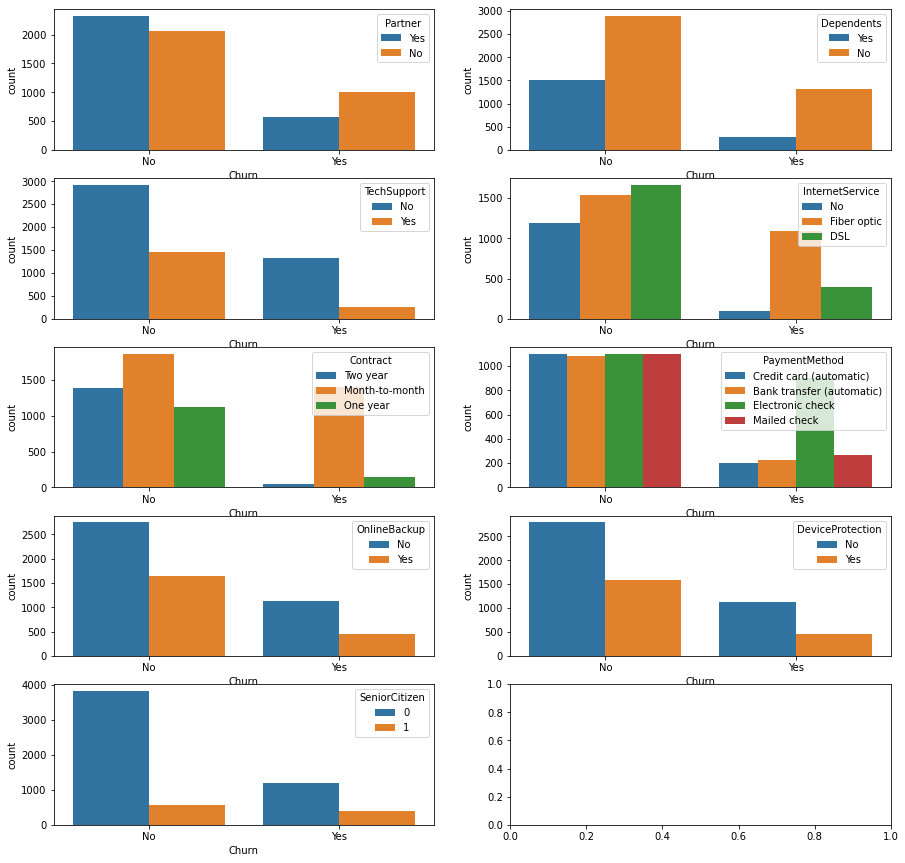

In [21]:
fig, ax = plt.subplots(5,2,figsize=(15,15))

sns.countplot(x=df['Churn'],hue=df["Partner"], ax=ax[0,0],data=df)
sns.countplot(df['Churn'],hue=df["Dependents"], ax=ax[0,1],data=df)

sns.countplot(x=df['Churn'],hue=df["TechSupport"], ax=ax[1,0],data=df)
sns.countplot(x=df['Churn'],hue=df["InternetService"],ax=ax[1,1],data=df)

sns.countplot(x=df['Churn'],hue=df["Contract"], ax=ax[2,0],data=df)
sns.countplot(x=df['Churn'],hue=df["PaymentMethod"],ax=ax[2,1],data=df)

sns.countplot(x=df['Churn'],hue=df["OnlineBackup"], ax=ax[3,0],data=df)
sns.countplot(x=df['Churn'],hue=df["DeviceProtection"],ax=ax[3,1],data=df)

df["SeniorCitizen"].astype(str)
sns.countplot(x=df['Churn'],hue=df["SeniorCitizen"], ax=ax[4,0],data=df)

plt.xlabel="Churn"
plt.ylabel="Count"

# Preparation du jeu de donnée

In [10]:
df2 = pd.DataFrame(df)
df2.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,Yes,Yes,72,Yes,Yes,No,No,No,No,No,Two year,No,Credit card (automatic),24.10,No
1,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,No
2,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,Yes
3,0,No,No,4,Yes,No,DSL,No,No,No,No,Month-to-month,Yes,Electronic check,55.90,No
4,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,Month-to-month,No,Electronic check,53.45,No


In [11]:
# target
y = df['Churn']
y.replace({"No":0, "Yes":1}, inplace=True)
#y.astype(int)
y
col_del = ['Churn']

df2 = df.drop(col_del,axis=1)
df2.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,0,Yes,Yes,72,Yes,Yes,No,No,No,No,No,Two year,No,Credit card (automatic),24.10
1,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15
2,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95
3,0,No,No,4,Yes,No,DSL,No,No,No,No,Month-to-month,Yes,Electronic check,55.90
4,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,Month-to-month,No,Electronic check,53.45


In [12]:
cat=['Partner','SeniorCitizen','Dependents','PhoneService',
    'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
    'PaperlessBilling']
cat2=['PaymentMethod','Contract','InternetService','MultipleLines']
 
for column in cat2:
    tempdf = pd.get_dummies(df2[column], prefix=column)
    df2 = pd.concat([df2,tempdf],axis=1)
    df2 = df2.drop(columns=column)
    
for column in cat:
    df2[column].replace({"No":0, "Yes":1}, inplace=True)
df2.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,PaperlessBilling,...,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_DSL,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes
0,0,1,1,72,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
1,0,0,0,44,1,0,1,1,0,1,...,0,1,0,0,0,1,0,1,0,0
2,1,1,0,38,1,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,0,0,4,1,0,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0
4,0,0,0,2,1,1,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0


In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5976 entries, 0 to 5985
Data columns (total 24 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            5976 non-null   int64  
 1   Partner                                  5976 non-null   int64  
 2   Dependents                               5976 non-null   int64  
 3   tenure                                   5976 non-null   int64  
 4   PhoneService                             5976 non-null   int64  
 5   OnlineSecurity                           5976 non-null   int64  
 6   OnlineBackup                             5976 non-null   int64  
 7   DeviceProtection                         5976 non-null   int64  
 8   TechSupport                              5976 non-null   int64  
 9   PaperlessBilling                         5976 non-null   int64  
 10  MonthlyCharges                           5976 no

## Randomforest

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

X = df2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state=321)

In [14]:
clf = RandomForestClassifier(n_jobs=-1)
parmas={
    'n_estimators' : [10,20,30,40,50,60,70,80,90,100,125,150,175,200,250,300,400,500],
    'min_samples_split' : [2,3,4,5,6,7],
    'min_samples_leaf' : [1,2,3,4,5]       
}


In [15]:
arbre= GridSearchCV(clf,parmas, cv=5).fit(X_train,y_train)

In [16]:
from imblearn.metrics import classification_report_imbalanced
y_pred = arbre.predict(X_test)
print(pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite']))
print(classification_report_imbalanced(y_test, y_pred))

scores = arbre.score(X_train,y_train)
print("Accuracy on training set score: {:.3f}".format(scores))
print("Accuracy on test set score: {:.3f}".format(arbre.score(X_test, y_test)))

Classe prédite    0    1
Classe réelle           
0               989   93
1               220  192
                   pre       rec       spe        f1       geo       iba       sup

          0       0.82      0.91      0.47      0.86      0.65      0.45      1082
          1       0.67      0.47      0.91      0.55      0.65      0.41       412

avg / total       0.78      0.79      0.59      0.78      0.65      0.43      1494

Accuracy on training set score: 0.851
Accuracy on test set score: 0.790


In [17]:
scoring = ['accuracy','f1']
arbre2=GridSearchCV(clf,parmas, scoring=scoring,refit="f1", cv=5).fit(X_train,y_train)

In [18]:
y_pred = arbre2.predict(X_test)
print(pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite']))
print(classification_report_imbalanced(y_test, y_pred))

Classe prédite    0    1
Classe réelle           
0               987   95
1               217  195
                   pre       rec       spe        f1       geo       iba       sup

          0       0.82      0.91      0.47      0.86      0.66      0.45      1082
          1       0.67      0.47      0.91      0.56      0.66      0.41       412

avg / total       0.78      0.79      0.59      0.78      0.66      0.44      1494



In [19]:
arbre3=GridSearchCV(clf,parmas, scoring="f1", cv=5).fit(X_train,y_train)

In [20]:
y_pred = arbre3.predict(X_test)
print(pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite']))
print(classification_report_imbalanced(y_test, y_pred))

Classe prédite    0    1
Classe réelle           
0               987   95
1               215  197
                   pre       rec       spe        f1       geo       iba       sup

          0       0.82      0.91      0.48      0.86      0.66      0.46      1082
          1       0.67      0.48      0.91      0.56      0.66      0.42       412

avg / total       0.78      0.79      0.60      0.78      0.66      0.44      1494



In [21]:
arbre4=GridSearchCV(clf,parmas, scoring="recall", cv=5).fit(X_train,y_train)

In [22]:
y_pred = arbre4.predict(X_test)
print(pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite']))
print(classification_report_imbalanced(y_test, y_pred))

Classe prédite    0    1
Classe réelle           
0               964  118
1               210  202
                   pre       rec       spe        f1       geo       iba       sup

          0       0.82      0.89      0.49      0.85      0.66      0.45      1082
          1       0.63      0.49      0.89      0.55      0.66      0.42       412

avg / total       0.77      0.78      0.60      0.77      0.66      0.44      1494



### DecisionTreeClassifier

In [24]:
from sklearn.tree import DecisionTreeClassifier
clf_gini=DecisionTreeClassifier()
parmas2={
    "criterion":["gini", "entropy"],
    "min_samples_split":[2,3,4,5,10],
    "min_samples_leaf":[1,3,5,10],
    "max_depth":[None,5,10,15],
    "max_features":[None,"sqrt","log2"],
    "class_weight":[None,"balanced"]
}

In [25]:
tree= GridSearchCV(clf_gini,parmas2, cv=5).fit(X_train,y_train)

In [26]:
y_pred = tree.predict(X_test)
print(pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite']))
print(classification_report_imbalanced(y_test, y_pred))

Classe prédite    0    1
Classe réelle           
0               926  156
1               173  239
                   pre       rec       spe        f1       geo       iba       sup

          0       0.84      0.86      0.58      0.85      0.70      0.51      1082
          1       0.61      0.58      0.86      0.59      0.70      0.48       412

avg / total       0.78      0.78      0.66      0.78      0.70      0.50      1494



In [27]:
scoring = ['accuracy','f1']
tree2=GridSearchCV(clf_gini,parmas2, scoring=scoring,refit="f1", cv=5).fit(X_train,y_train)

In [28]:
y_pred = tree2.predict(X_test)
print(pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite']))
print(classification_report_imbalanced(y_test, y_pred))

Classe prédite    0    1
Classe réelle           
0               767  315
1                76  336
                   pre       rec       spe        f1       geo       iba       sup

          0       0.91      0.71      0.82      0.80      0.76      0.57      1082
          1       0.52      0.82      0.71      0.63      0.76      0.58       412

avg / total       0.80      0.74      0.79      0.75      0.76      0.58      1494



In [29]:
tree3=GridSearchCV(clf_gini,parmas2, scoring="f1", cv=5).fit(X_train,y_train)

In [30]:
y_pred = tree3.predict(X_test)
print(pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite']))
print(classification_report_imbalanced(y_test, y_pred))

Classe prédite    0    1
Classe réelle           
0               767  315
1                76  336
                   pre       rec       spe        f1       geo       iba       sup

          0       0.91      0.71      0.82      0.80      0.76      0.57      1082
          1       0.52      0.82      0.71      0.63      0.76      0.58       412

avg / total       0.80      0.74      0.79      0.75      0.76      0.58      1494



In [31]:
tree4=GridSearchCV(clf_gini,parmas2, scoring="recall", cv=5).fit(X_train,y_train)

In [32]:
y_pred = tree4.predict(X_test)
print(pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite']))
print(classification_report_imbalanced(y_test, y_pred))

Classe prédite    0    1
Classe réelle           
0               645  437
1                56  356
                   pre       rec       spe        f1       geo       iba       sup

          0       0.92      0.60      0.86      0.72      0.72      0.50      1082
          1       0.45      0.86      0.60      0.59      0.72      0.53       412

avg / total       0.79      0.67      0.79      0.69      0.72      0.51      1494



## Sauvegarde des modèles


In [36]:
import joblib
# Randomforest
joblib_file = "joblib_Randomforest_Model.pkl"  
joblib.dump(arbre, joblib_file)

# DecisionTreeClassifier
joblib_file = "joblib_DecisionTreeClassifier_Model.pkl"  
joblib.dump(tree, joblib_file)


['joblib_DecisionTreeClassifier_Model.pkl']

In [15]:
# sauvegarde de X_test et y_test
pd.concat([X_test, y_test], axis=1).to_csv('df_test.csv',index=False)
